<a href="https://colab.research.google.com/github/mehedi184/Aquaculture-Analysis-based-on-Machine-Learning/blob/master/Thesis_LSTM2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Pre processed
fire the system

In [47]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.font_manager
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras import metrics
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [48]:
%pwd


'/content'

In [49]:
!git clone https://github.com/mehedi184/-Machine-Learning-based-Real-Time-ETP-Outlet-Monitoring-through-E-IoT.git

Cloning into '-Machine-Learning-based-Real-Time-ETP-Outlet-Monitoring-through-E-IoT'...
fatal: could not read Username for 'https://github.com': No such device or address


Read data

In [50]:
df = pd.read_csv('/content/WQI_s.csv')
df

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,WQC,Numeric_WQC,Verdict
0,8/15/2020 0:00:00,33.44,7.55,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
1,8/15/2020 0:01:00,33.44,7.94,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
2,8/15/2020 0:03:00,33.44,7.88,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
3,8/15/2020 0:05:00,33.44,7.82,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
4,8/15/2020 0:06:00,33.44,8.01,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4702,8/20/2020 10:36:00,33.57,7.88,7.0,4.14,284.41,0.77,91.26,Very Good,1,0
4703,8/20/2020 10:38:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4704,8/20/2020 10:40:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4705,8/20/2020 10:41:00,33.57,7.88,7.0,4.14,284.39,0.77,91.26,Very Good,1,0


<Axes: xlabel='Date'>

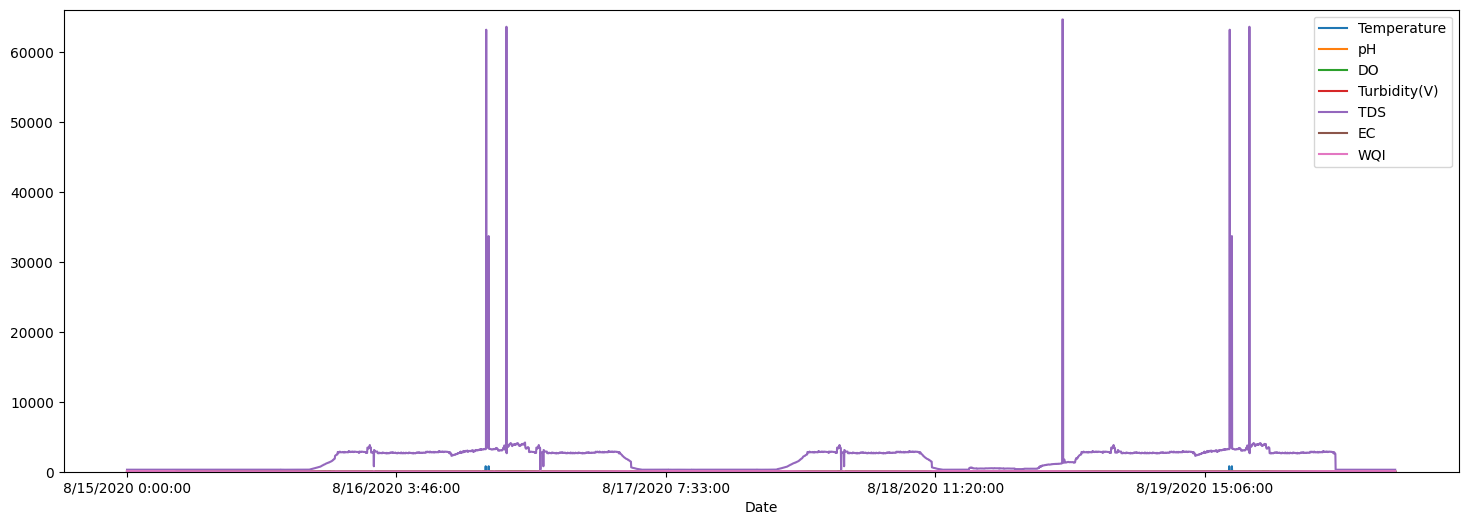

In [51]:
df.plot('Date', ['Temperature', 'pH','DO','Turbidity(V)','TDS','EC', 'WQI'],figsize=(18,6),ylim=(0,66000))

In [52]:
df_mean = df.select_dtypes(include=np.number).mean() # Calculate the mean of only numeric columns
dataset_train=df.replace(np.nan, df_mean)
dataset_train

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,WQC,Numeric_WQC,Verdict
0,8/15/2020 0:00:00,33.44,7.55,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
1,8/15/2020 0:01:00,33.44,7.94,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
2,8/15/2020 0:03:00,33.44,7.88,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
3,8/15/2020 0:05:00,33.44,7.82,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
4,8/15/2020 0:06:00,33.44,8.01,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4702,8/20/2020 10:36:00,33.57,7.88,7.0,4.14,284.41,0.77,91.26,Very Good,1,0
4703,8/20/2020 10:38:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4704,8/20/2020 10:40:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4705,8/20/2020 10:41:00,33.57,7.88,7.0,4.14,284.39,0.77,91.26,Very Good,1,0


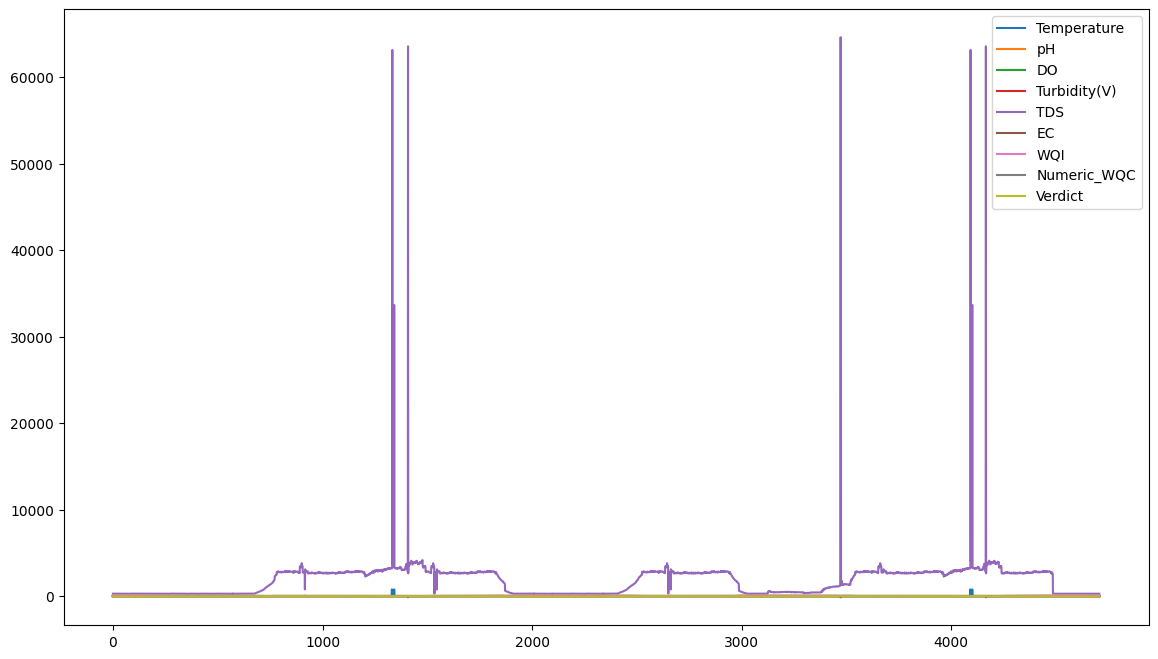

In [53]:
dataset_train.plot(figsize=(14,8))
plt.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

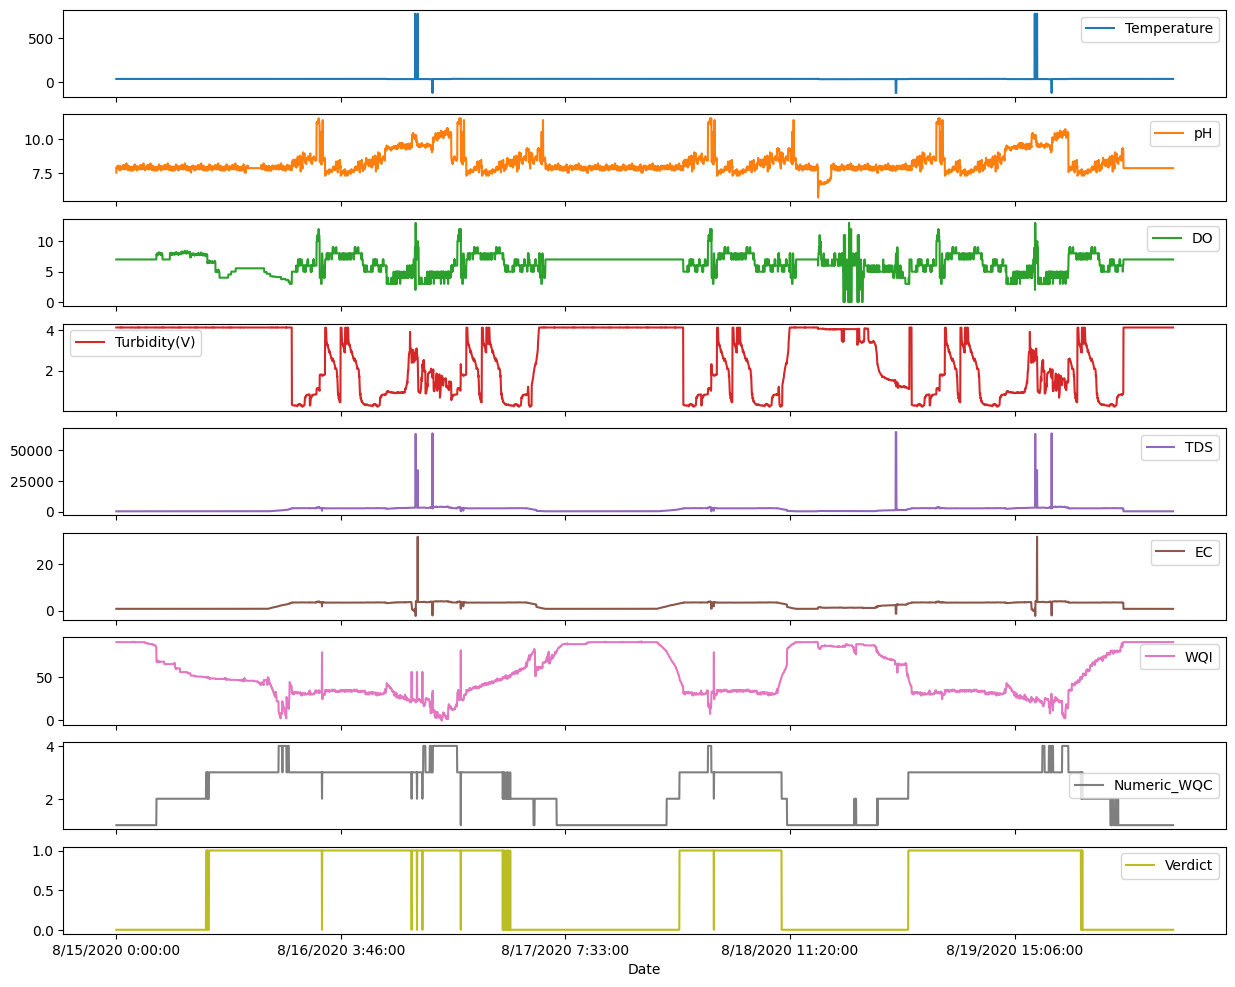

In [54]:
dataset_train.plot(0, [1,2,3,4,5,6,7,8,9,10], subplots=True, figsize=(15,12))


In [55]:
print(dataset_train.dtypes)

Date             object
Temperature     float64
pH              float64
DO              float64
Turbidity(V)    float64
TDS             float64
EC              float64
WQI             float64
WQC              object
Numeric_WQC       int64
Verdict           int64
dtype: object


#Data processing

Removing all commas and convert data to matrix shape format.



In [56]:

# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:8]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['Date'])
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y %H:%M:%S') for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (4707, 11)
All timestamps == 4707
Featured selected: ['Temperature', 'pH', 'DO', 'Turbidity(V)', 'TDS', 'EC', 'WQI']


In [57]:
datelist_train

[datetime.datetime(2020, 8, 15, 0, 0),
 datetime.datetime(2020, 8, 15, 0, 1),
 datetime.datetime(2020, 8, 15, 0, 3),
 datetime.datetime(2020, 8, 15, 0, 5),
 datetime.datetime(2020, 8, 15, 0, 6),
 datetime.datetime(2020, 8, 15, 0, 8),
 datetime.datetime(2020, 8, 15, 0, 10),
 datetime.datetime(2020, 8, 15, 0, 11),
 datetime.datetime(2020, 8, 15, 0, 13),
 datetime.datetime(2020, 8, 15, 0, 15),
 datetime.datetime(2020, 8, 15, 0, 16),
 datetime.datetime(2020, 8, 15, 0, 18),
 datetime.datetime(2020, 8, 15, 0, 20),
 datetime.datetime(2020, 8, 15, 0, 21),
 datetime.datetime(2020, 8, 15, 0, 23),
 datetime.datetime(2020, 8, 15, 0, 25),
 datetime.datetime(2020, 8, 15, 0, 26),
 datetime.datetime(2020, 8, 15, 0, 28),
 datetime.datetime(2020, 8, 15, 0, 30),
 datetime.datetime(2020, 8, 15, 0, 31),
 datetime.datetime(2020, 8, 15, 0, 33),
 datetime.datetime(2020, 8, 15, 0, 35),
 datetime.datetime(2020, 8, 15, 0, 36),
 datetime.datetime(2020, 8, 15, 0, 38),
 datetime.datetime(2020, 8, 15, 0, 40),
 datet

In [58]:
dataset_train = pd.DataFrame(dataset_train, columns=cols)
dataset_train.index = datelist_train
dataset_train.index = pd.to_datetime(dataset_train.index)

In [59]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')
dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset_train[i][j] = dataset_train[i][j].replace(',', '')
<ipython-input-59-250bc7f78b1d>:4: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  dataset_train[i][j] = dataset_train[i][j].replace(',', '')
<ipython-input-59-250bc7f78b1d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset_train[i][j] = dataset_train[i][j].replace(',', '')
<ipython-input-59-250bc7f78b1d>:4: FutureWarning: ChainedAssignmentError: behaviour wil

Shape of training set == (4707, 7).


array([[ 33.44,   7.55,   7.  , ..., 289.  ,   0.78,  91.19],
       [ 33.44,   7.94,   7.  , ..., 291.  ,   0.79,  91.19],
       [ 33.44,   7.88,   7.  , ..., 291.  ,   0.79,  91.19],
       ...,
       [ 33.57,   7.88,   7.  , ..., 284.4 ,   0.77,  91.26],
       [ 33.57,   7.88,   7.  , ..., 284.39,   0.77,  91.26],
       [ 33.57,   7.88,   7.  , ..., 284.39,   0.77,  91.26]])

In [60]:
#installing mglearn -- just takes 5s to install -- it's a built in function to understand the difference between the different scalers.
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.2 MB/s eta 0:00:00


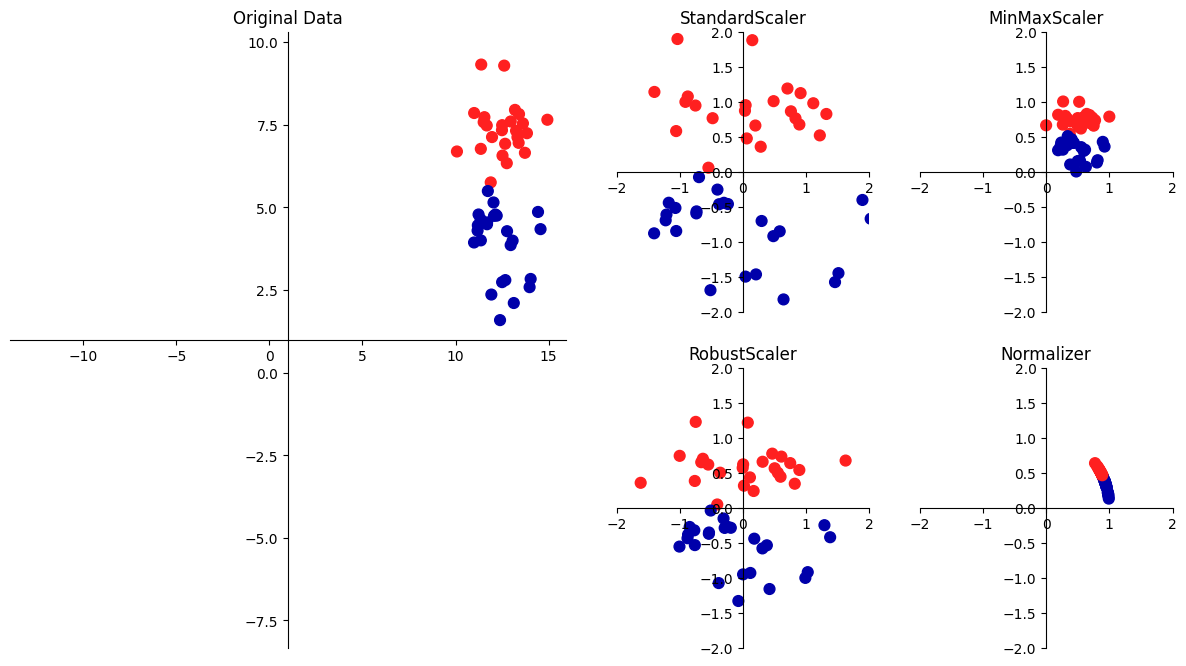

In [61]:
import mglearn
#this is just a built in thing to understand the difference between the different scalers
mglearn.plots.plot_scaling()

In [62]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 6:7])

array([[1.40875528],
       [1.40875528],
       [1.40875528],
       ...,
       [1.41140702],
       [1.41140702],
       [1.41140702]])

In [63]:

# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 3  # Number of days we want top predict into the future
n_past = 5    # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 6:7])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (4700, 5, 6).
y_train shape == (4700, 1, 1).


In [64]:
X_train=X_train.astype(int)
y_train=y_train.astype(int)

#Create a model Training

Building the LSTM based Neural Network

In [65]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD
import tensorflow as tf

In [66]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))
model.add(Dropout(0.5))
# Adding 2nd LSTM layer
model.add(LSTM(units=32, return_sequences=False))

# Adding Dropout
model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))
# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 64)          │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,688 (123.78 KB)

 Trainable params: 31,688 (123.78 KB)

 Non-trainable params: 0 (0.00 B)

Start training

In [69]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train,
                    shuffle=True,
                    epochs=100,
                    callbacks=[es, rlr, mcp, tb],
                    validation_split=0.2 ,
                    validation_data=(X_train, y_train),
                    verbose=1,
                    batch_size=64)

Epoch 1/100
73/74 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6141 - loss: 0.3099
Epoch 1: val_loss improved from inf to 0.17251, saving model to weights.weights.h5
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.6154 - loss: 0.3083 - val_accuracy: 0.7279 - val_loss: 0.1725 - learning_rate: 0.0100
Epoch 2/100
73/74 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6906 - loss: 0.1935
Epoch 2: val_loss improved from 0.17251 to 0.16705, saving model to weights.weights.h5
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6910 - loss: 0.1933 - val_accuracy: 0.7317 - val_loss: 0.1671 - learning_rate: 0.0100
Epoch 3/100
73/74 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7112 - loss: 0.1784
Epoch 3: val_loss improved from 0.16705 to 0.15865, saving model to weights.weights.h5
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7110 - loss: 0.1785 - val_accuracy: 0.7364 - val_loss: 0.1587 - learning_rate: 0.0100
Epoch 4/100
71/74 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.

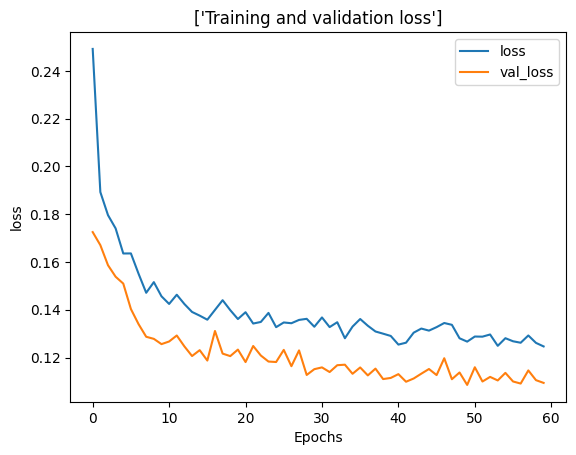

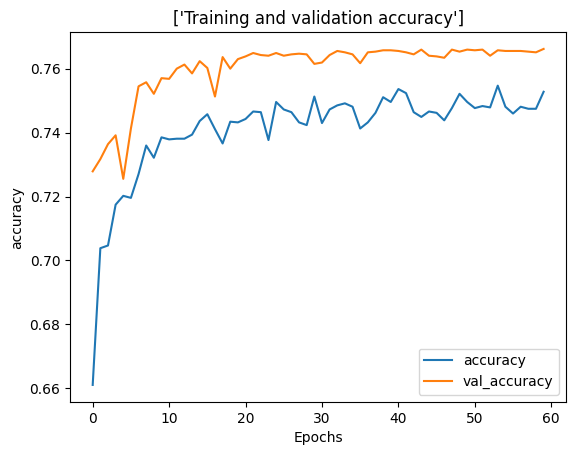

[0.24916082620620728, 0.1892581731081009, 0.17960962653160095, 0.17403928935527802, 0.16355031728744507, 0.16357624530792236, 0.1550821214914322, 0.14710214734077454, 0.1515599638223648, 0.14563781023025513, 0.14243276417255402, 0.1462908536195755, 0.1423938274383545, 0.13908027112483978, 0.137539342045784, 0.135841503739357, 0.13993051648139954, 0.14400523900985718, 0.13983365893363953, 0.13612014055252075, 0.13897059857845306, 0.1342296004295349, 0.13489724695682526, 0.13868193328380585, 0.13272029161453247, 0.13467948138713837, 0.13436464965343475, 0.13574939966201782, 0.1362050324678421, 0.13288700580596924, 0.1367868036031723, 0.13274921476840973, 0.13477961719036102, 0.1280757635831833, 0.1329512596130371, 0.13612928986549377, 0.1333083212375641, 0.13090619444847107, 0.1299898326396942, 0.12903663516044617, 0.12542206048965454, 0.126217782497406, 0.1304144412279129, 0.13213227689266205, 0.1312675178050995, 0.13273565471172333, 0.1344563066959381, 0.13369415700435638, 0.1280645281

In [70]:
def plot_graphs(history, string):
  plt.title(['Training and validation '+string])
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "loss")
plot_graphs(history, "accuracy")
print(history.history['loss'])
print(history.history['val_loss'])

print(history.history['accuracy'])
print(history.history['val_accuracy'])

#Make future predictions

In [71]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date().ctime())

In [72]:
datelist_future


[Timestamp('2020-08-20 10:43:00'),
 Timestamp('2020-08-21 10:43:00'),
 Timestamp('2020-08-22 10:43:00')]

In [73]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [74]:
predictions_future.shape

(3, 1)

In [75]:
predictions_train.shape

(4695, 1)

In [76]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.datetime)
    '''
    return datetime.strptime(x.strftime('%m/%d/%Y %H:%M:%S'), '%m/%d/%Y %H:%M:%S')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)


 Make predictions for future dates

In [77]:
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['WQI']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['WQI']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)


In [78]:
PREDICTION_TRAIN=round(PREDICTION_TRAIN)
PREDICTION_TRAIN

,WQI
2020-08-15 00:20:00,74.0
2020-08-15 00:21:00,74.0
2020-08-15 00:23:00,74.0
2020-08-15 00:25:00,74.0
2020-08-15 00:26:00,74.0
...,...
2020-08-20 10:36:00,74.0
2020-08-20 10:38:00,74.0
2020-08-20 10:40:00,74.0
2020-08-20 10:41:00,74.0


from matplotlib import pyplot as plt
PREDICTION_TRAIN['WQI'].plot(kind='hist', bins=20, title='WQI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
PREDICTION_TRAIN['WQI'].plot(kind='line', figsize=(8, 4), title='WQI')
plt.gca().spines[['top', 'right']].set_visible(False)

In [79]:
PREDICTION_TRAIN.shape

(4695, 1)

In [80]:
PREDICTIONS_FUTURE=round(PREDICTIONS_FUTURE)

In [81]:
PREDICTIONS_FUTURE

,WQI
2020-08-20 10:43:00,74.0
2020-08-21 10:43:00,74.0
2020-08-22 10:43:00,74.0


In [82]:
PREDICTIONS_FUTURE.shape

(3, 1)

In [83]:
plt.ion()

Visualize the Predictions

In [101]:
!apt-get update
!apt-get install -y fonts-liberation

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,384 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,844 kB]
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/mai

In [103]:
!pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 55.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [105]:
import matplotlib
print(matplotlib.__version__)

3.10.0


In [114]:
import matplotlib.font_manager

# Find available fonts
available_fonts = matplotlib.font_manager.findSystemFonts()

# Print the first 10 available fonts (for example)
for font_path in available_fonts[:10]:
    print(font_path)

# Select a desired font path from the list
selected_font_path = available_fonts[0]  # Example: Select the first font

# Update the font cache
matplotlib.font_manager.fontManager.addfont(selected_font_path)

# If you want to add multiple fonts from a directory:
font_directory = '/usr/share/fonts/truetype/liberation'  # Replace with your directory
matplotlib.font_manager.findSystemFonts(fontpaths=[font_directory])

/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf
/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf


['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truety

In [111]:
!apt-get install -y ttf-mscorefonts-installer

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cabextract distro-info libmspack0 python3-chardet python3-debconf
  python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ubuntu-advantage-tools ubuntu-pro-client
  ubuntu-pro-client-l10n ubuntu-release-upgrader-core update-manager-core
  update-notifier-common xfonts-encodings xfonts-utils zstd
Suggested packages:
  shunit2
The following NEW packages will be installed:
  cabextract distro-info libmspack0 python3-chardet python3-debconf
  python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ttf-mscorefonts-installer
  ubuntu-advantage-tools ubuntu-pro-client ubuntu-pro-client-l10n
  ubuntu-release-upgrader-core update-manager-core update-notifier-common
  xfonts-encodings xfonts-utils zstd
0 upgraded, 20 newly installed, 0 to remove and 36 not upgraded.
Need 

In [136]:
import matplotlib.dates as mdates


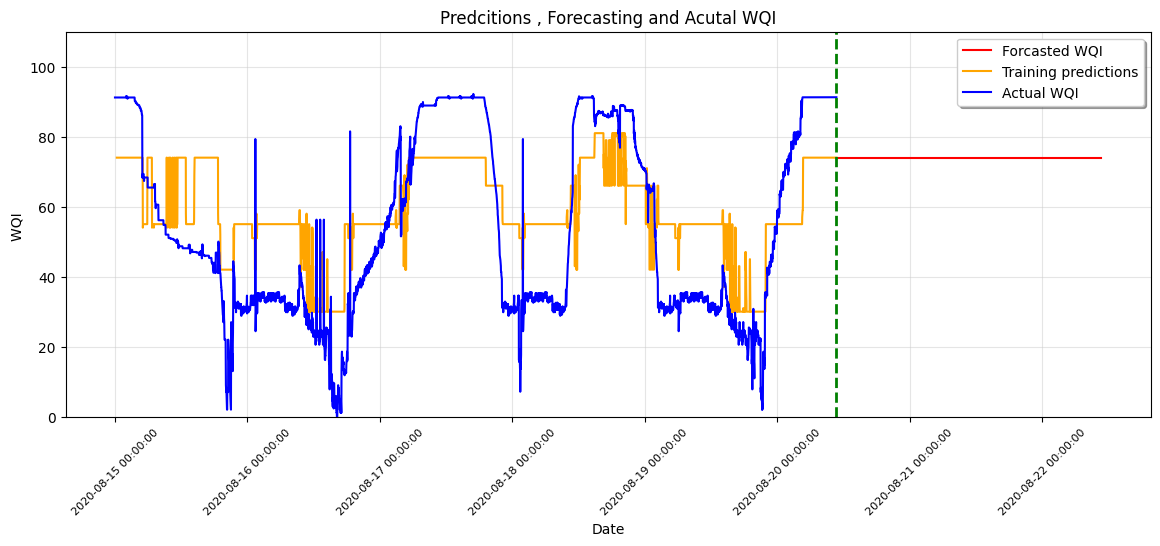

In [150]:
# Set plot size
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '8/15/2020 00:00:00'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['WQI'], color='r', label='Forcasted WQI')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['WQI'], color='orange', label='Training predictions')
plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['WQI'], color='b', label='Actual WQI')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions , Forecasting and Acutal WQI', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('WQI ', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))  # Updated format string
ax.set_ylim([0,110])
plt.show()


In [152]:
print(PREDICTIONS_FUTURE.index[:5])


DatetimeIndex(['2020-08-20 10:43:00', '2020-08-21 10:43:00',
               '2020-08-22 10:43:00'],
              dtype='datetime64[ns]', freq=None)


In [153]:
PREDICTIONS_FUTURE.index = pd.to_datetime(PREDICTIONS_FUTURE.index)


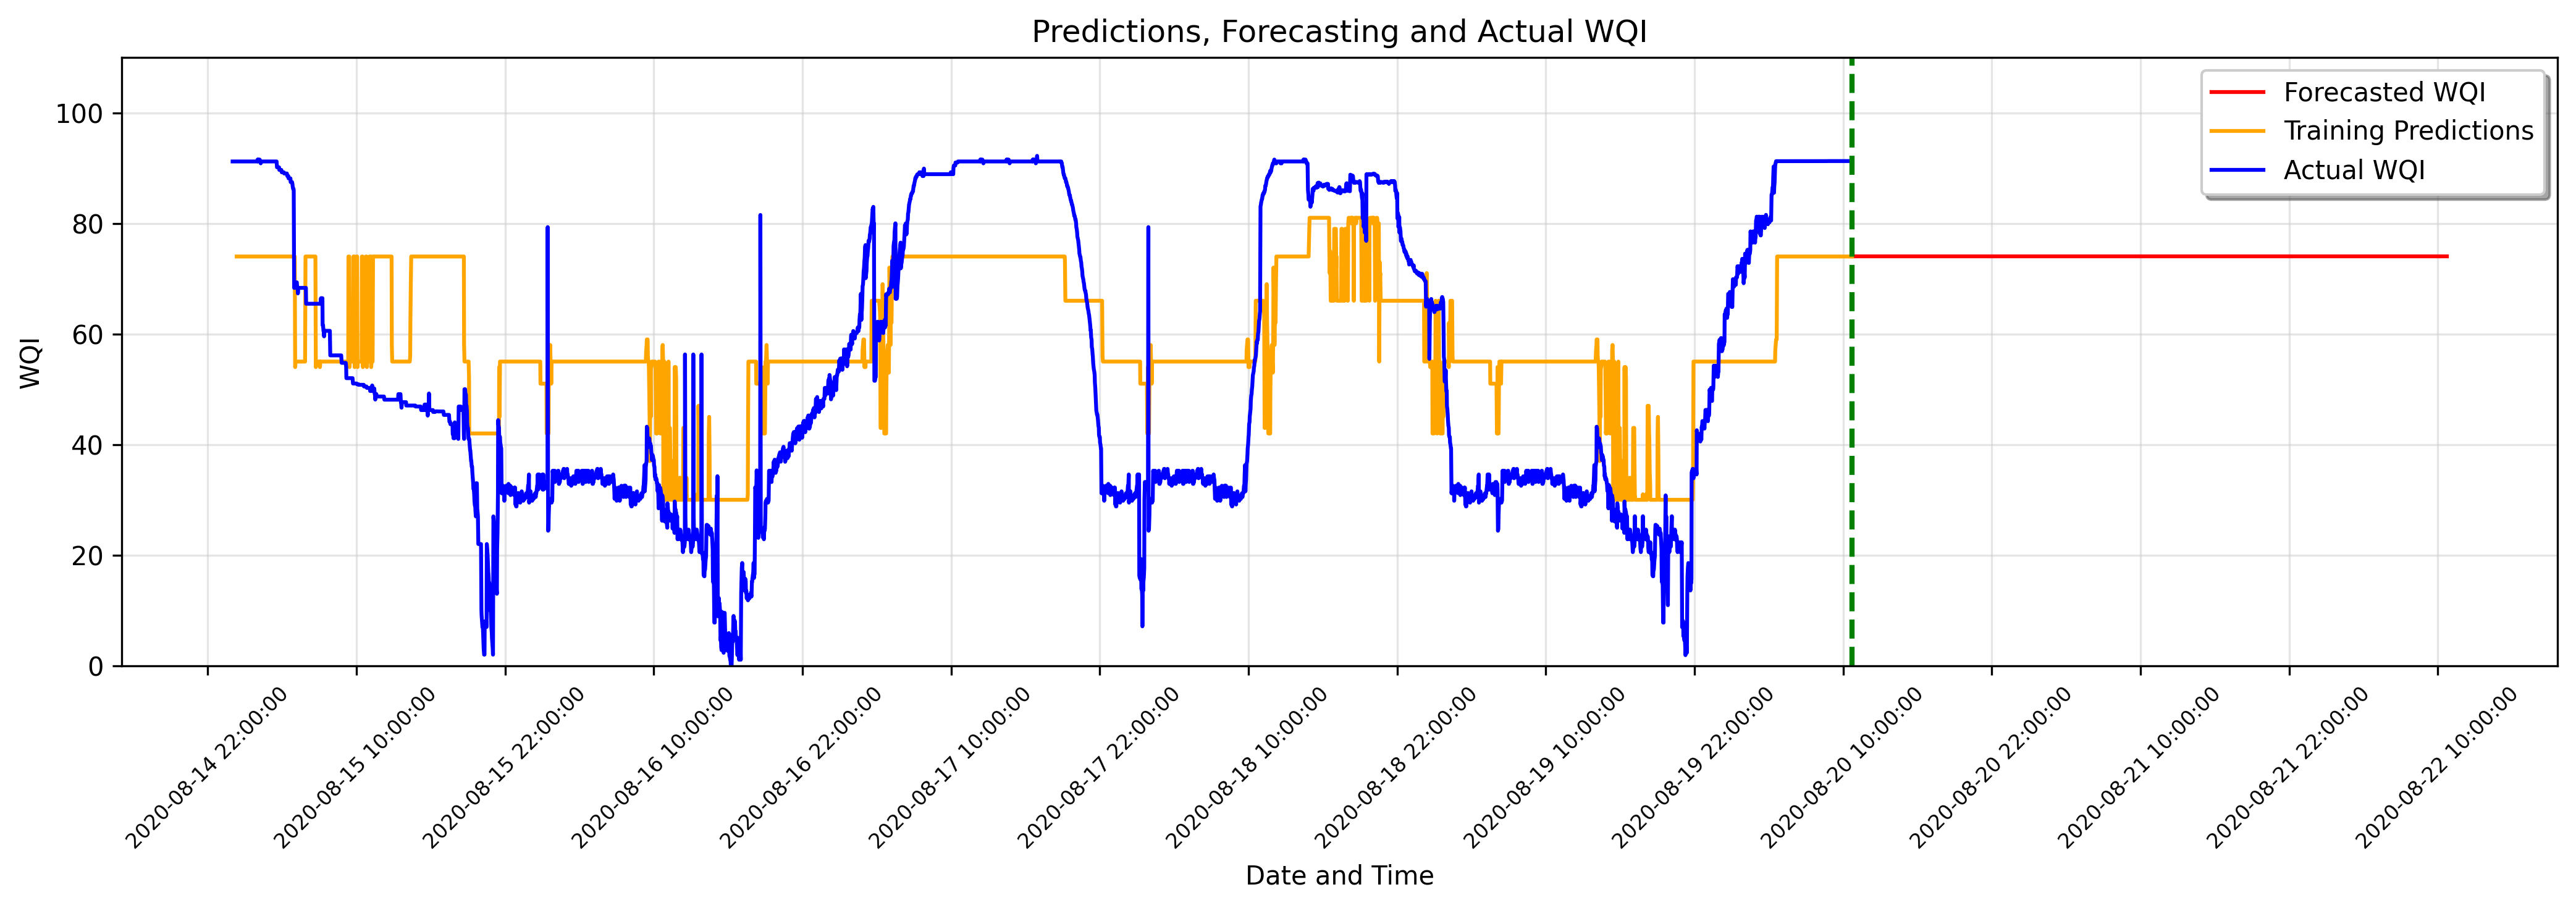

<Figure size 4200x1500 with 0 Axes>

In [166]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import rcParams

# Set plot size
rcParams['figure.figsize'] = 14, 5

# Plot
START_DATE_FOR_PLOTTING = '8/15/2020 00:00:00'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['WQI'], color='r', label='Forecasted WQI')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index,
         PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['WQI'], color='orange', label='Training Predictions')
plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index,
         dataset_train.loc[START_DATE_FOR_PLOTTING:]['WQI'], color='b', label='Actual WQI')

plt.axvline(x=min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

# Formatting
plt.grid(which='major', color='#cccccc', alpha=0.5)
plt.legend(shadow=True)
plt.title('Predictions, Forecasting and Actual WQI', fontsize=12)
plt.xlabel('Date and Time', fontsize=10)
plt.ylabel('WQI', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

# Get axis and apply date formatter
ax = plt.gca()
ax.set_ylim([0, 110])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))  # or mdates.MinuteLocator()


plt.tight_layout()
plt.show()
plt.savefig('WQI_LSTM.png', dpi=300)

In [143]:
PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['WQI']

(DatetimeIndex(['2020-08-20 10:43:00', '2020-08-21 10:43:00',
                '2020-08-22 10:43:00'],
               dtype='datetime64[ns]', freq=None),
 2020-08-20 10:43:00    74.0
 2020-08-21 10:43:00    74.0
 2020-08-22 10:43:00    74.0
 Name: WQI, dtype: float32)

Evaluating Time Forcasting's prediction

In [85]:
total_rmse = 0
for i in range(len(PREDICTION_TRAIN)-3):

        rmse = np.sqrt(mean_squared_error(PREDICTION_TRAIN[i:i+3], PREDICTIONS_FUTURE))
        rmse=rmse*6
        print('t+%d RMSE: %f' % ((i+5), rmse))
        total_rmse += rmse

t+5 RMSE: 0.000000
t+6 RMSE: 0.000000
t+7 RMSE: 0.000000
t+8 RMSE: 0.000000
t+9 RMSE: 0.000000
t+10 RMSE: 0.000000
t+11 RMSE: 0.000000
t+12 RMSE: 0.000000
t+13 RMSE: 0.000000
t+14 RMSE: 0.000000
t+15 RMSE: 0.000000
t+16 RMSE: 0.000000
t+17 RMSE: 0.000000
t+18 RMSE: 0.000000
t+19 RMSE: 0.000000
t+20 RMSE: 0.000000
t+21 RMSE: 0.000000
t+22 RMSE: 0.000000
t+23 RMSE: 0.000000
t+24 RMSE: 0.000000
t+25 RMSE: 0.000000
t+26 RMSE: 0.000000
t+27 RMSE: 0.000000
t+28 RMSE: 0.000000
t+29 RMSE: 0.000000
t+30 RMSE: 0.000000
t+31 RMSE: 0.000000
t+32 RMSE: 0.000000
t+33 RMSE: 0.000000
t+34 RMSE: 0.000000
t+35 RMSE: 0.000000
t+36 RMSE: 0.000000
t+37 RMSE: 0.000000
t+38 RMSE: 0.000000
t+39 RMSE: 0.000000
t+40 RMSE: 0.000000
t+41 RMSE: 0.000000
t+42 RMSE: 0.000000
t+43 RMSE: 0.000000
t+44 RMSE: 0.000000
t+45 RMSE: 0.000000
t+46 RMSE: 0.000000
t+47 RMSE: 0.000000
t+48 RMSE: 0.000000
t+49 RMSE: 0.000000
t+50 RMSE: 0.000000
t+51 RMSE: 0.000000
t+52 RMSE: 0.000000
t+53 RMSE: 0.000000
t+54 RMSE: 0.000000
t+55 

In [87]:
print('total rmse: ', total_rmse)
print('actual acc:',(total_rmse/(len(PREDICTION_TRAIN))) ,'%')

total rmse:  439408.2987234293
actual acc: 93.59069195387207 %


In [88]:
# Using sklearn
from sklearn.metrics import r2_score
print(r2_score(PREDICTION_TRAIN[i:i+3], PREDICTIONS_FUTURE))

1.0


#Walk Forward Validation

Using keras models with scikit-learn pipelines

In [89]:
series= PREDICTION_TRAIN
series

,WQI
2020-08-15 00:20:00,74.0
2020-08-15 00:21:00,74.0
2020-08-15 00:23:00,74.0
2020-08-15 00:25:00,74.0
2020-08-15 00:26:00,74.0
...,...
2020-08-20 10:36:00,74.0
2020-08-20 10:38:00,74.0
2020-08-20 10:40:00,74.0
2020-08-20 10:41:00,74.0


In [90]:
# split data into train and test
X = series.values   # X is still a column vector with 36 rows
print(X)

[[74.]
 [74.]
 [74.]
 ...
 [74.]
 [74.]
 [74.]]


In [91]:
series1=PREDICTIONS_FUTURE

In [92]:
Y= series1.values

In [93]:
#X = dataset
train, test = X[:-1502], Y[-1502:]
train

array([[74.],
       [74.],
       [74.],
       ...,
       [79.],
       [79.],
       [79.]], dtype=float32)

In [94]:
test

array([[74.],
       [74.],
       [74.]], dtype=float32)

In [95]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])

    # report performance
rmse = sqrt(mean_squared_error(test, predictions))
#rmse=rmse/3
print('RMSE: %.3f' % (rmse))

RMSE: 2.887
